In [22]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sweetviz as sv
import pandas_profiling as pp

In [2]:
data = pd.read_csv('data.csv')
df = data.copy()
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.shape

(53943, 11)

In [6]:
df = df.drop(columns = "Unnamed: 0")

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


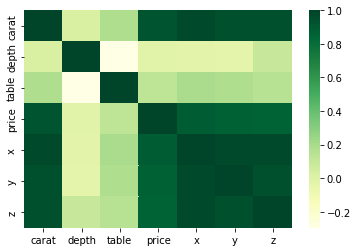

In [24]:
corr = df.corr()
sns.heatmap(corr, cmap = "YlGn")

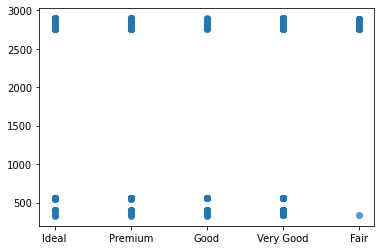

In [35]:
plt.scatter(x = test.cut, y = test.price, alpha = 0.70)

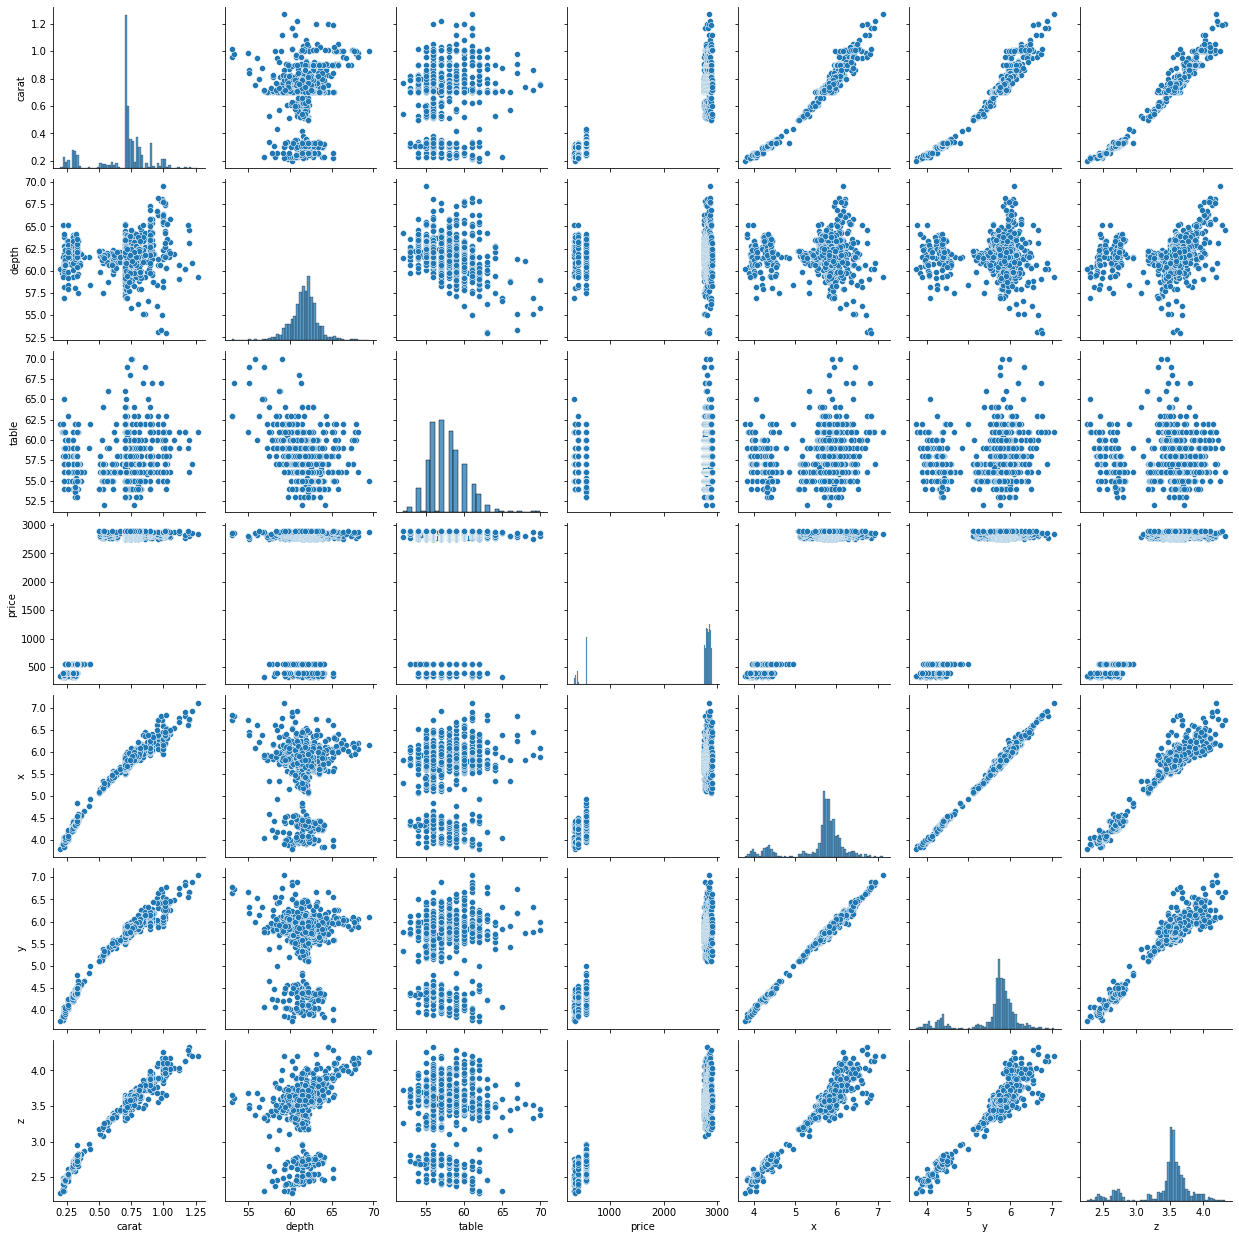

In [37]:
sns.pairplot(test)

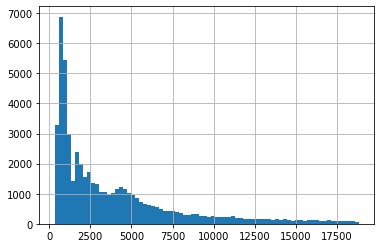

In [45]:
df.price.hist(bins='rice')

In [41]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat    1.116705
depth   -0.082187
table    0.796836
price    1.618476
x        0.378685
y        2.434233
z        1.522481
dtype: float64

In [46]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat     1.256902
depth     5.738874
table     2.801180
price     2.178040
x        -0.618030
y        91.219791
z        47.089370
dtype: float64

In [50]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

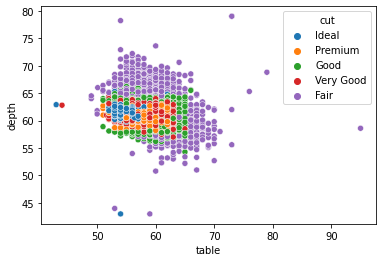

In [51]:
sns.scatterplot(x=df.table, y=df.depth, hue =df.cut)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [60]:
X = df[["carat","depth","table"]]
y = df.price

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
prediction = model.predict(x_test)

In [64]:
accuracy_score(y_test, prediction)

0.009639447585503754

###1.look for dependant and independant values
`other than dimensions and carat nothing is really dependant on anything`
###2.lookup for the skewness and kurtosis 
###3.Does table of diamond increase with price? 
`no it doesnt`
###4.What makes a diamond an premium cut? what are the factors a cut is dependant on? 
`they are dependant on the ratio of table and depth`